In [331]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Exercise 1

In [332]:
# Generating X
mean=[0,0]
cov=[[1,0],[0,1]]
X = np.random.multivariate_normal(mean,cov,200)

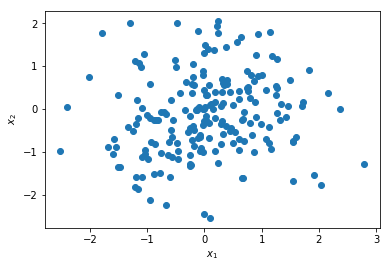

In [333]:
# Scatter plot of x1, x2
plt.scatter(X[:,0],X[:,1])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [334]:
# Our model
theta = [3,2,1,1]
y = theta[0] + theta[1]*X[:,0] + theta[2]*X[:,1] + \
    theta[3]*X[:,0]*X[:,1] + np.random.normal(0,0.05)

Text(0.5, 0, 'y')

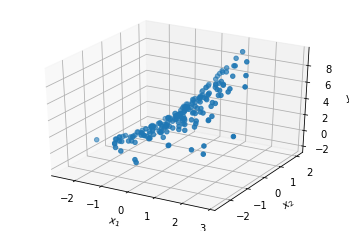

In [335]:
# Plot y, x_1, x_2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')

In [336]:
# Estimate theta according to least squares
Phi = np.array([X[:,0],X[:,1],X[:,0]*X[:,1]]).T
arr_ones = np.ones(len(Phi))
X_new = np.column_stack((arr_ones,Phi))
XTXinv = np.linalg.inv(np.dot(X_new.T,X_new));
theta_est = np.dot(XTXinv,X_new.T).dot(y)

In [337]:
theta_est

array([3.05358106, 2.        , 1.        , 1.        ])

#### Exercise 2

In [338]:
# Generate X
X = np.random.uniform(-2,2,size=(2000,2))
X_red = X[X[:,1]**2 - X[:,0]**2 > 0]
X_blue = X[X[:,1]**2 - X[:,0]**2 < 0]

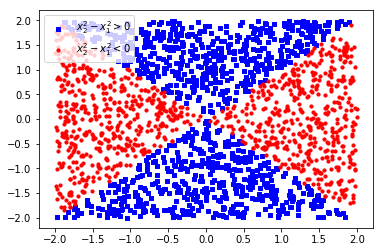

In [339]:
# Scatter plot of x1, x2
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_red[:,0], X_red[:,1], s=10, c='b', marker="s", label='$x_2^2 - x_1^2 > 0$')
ax1.scatter(X_blue[:,0],X_blue[:,1], s=10, c='r', marker="o", label='$x_2^2 - x_1^2 < 0$')
plt.legend(loc='upper left');
plt.show()

In [340]:
# Apply the transformation
Phi = np.array([X[:,0]**2,X[:,1]**2]).T
X_red_new = X_red**2
X_blue_new = X_blue**2

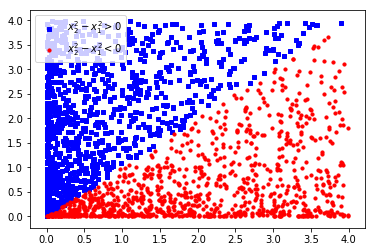

In [341]:
# Scatter plot of new x1, x2
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_red_new[:,0], X_red_new[:,1], s=10, c='b', marker="s", label='$x_2^2 - x_1^2 > 0$')
ax1.scatter(X_blue_new[:,0],X_blue_new[:,1], s=10, c='r', marker="o", label='$x_2^2 - x_1^2 < 0$')
plt.legend(loc='upper left');
plt.show()

In [342]:
# Estimate theta according to least squares
arr_ones = np.ones(len(Phi))
X_new = np.column_stack((arr_ones,Phi))
y = np.ones((2000,1))
y[X[:,1]**2 - X[:,0]**2 > 0] = 1
y[X[:,1]**2 - X[:,0]**2 < 0] = -1
XTXinv = np.linalg.inv(np.dot(X_new.T,X_new));
theta_est = np.dot(XTXinv,X_new.T).dot(y)
theta_est

array([[-0.01172633],
       [-0.46721367],
       [ 0.48286998]])

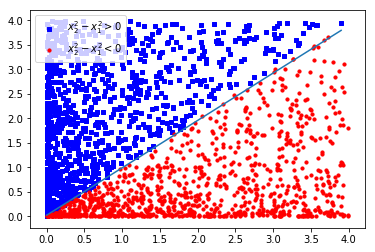

In [343]:
# Scatter plot of new x1, x2 with classification line
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_red_new[:,0], X_red_new[:,1], s=10, c='b', marker="s", label='$x_2^2 - x_1^2 > 0$')
ax1.scatter(X_blue_new[:,0],X_blue_new[:,1], s=10, c='r', marker="o", label='$x_2^2 - x_1^2 < 0$')
plt.legend(loc='upper left');
x = np.arange(0,4,0.1)
y2 = - theta_est[0]/theta_est[2] - (theta_est[1]/theta_est[2])*x
plt.plot(x,y2)
plt.show()

#### Exercise 5

In [344]:
# Data X
X = np.array([[1,1,1,1,1],[1,1,0,-1,-1],[1,-1,0.5,1,-1]]).T
y = np.array([1,1,1,-1,-1])
X

array([[ 1. ,  1. ,  1. ],
       [ 1. ,  1. , -1. ],
       [ 1. ,  0. ,  0.5],
       [ 1. , -1. ,  1. ],
       [ 1. , -1. , -1. ]])

In [345]:
# Estimate parameters
theta_est = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T).dot(y)
theta_est

array([0.19047619, 1.        , 0.0952381 ])

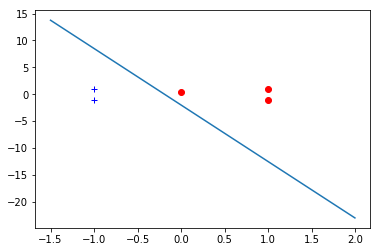

In [346]:
# Plot the data with the classification line
x = np.arange(-1.5,2,0.001)
plt.plot(X[0:3,1],X[0:3,2],'ro', label='label 1')
plt.plot(X[3:5,1],X[3:5,2],'b+', label= 'label 2')
y2 = - theta_est[0]/theta_est[2] - (theta_est[1]/theta_est[2])*x
plt.plot(x,y2)